In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']='simhei'
plt.rcParams['axes.unicode_minus']=False

df = pd.read_csv('data.csv')
df

,city,date,bad,die,good
0,安徽,2020/2/29,990,6,888
1,安徽,2020/3/31,990,6,984
2,安徽,2020/4/30,991,6,985
3,安徽,2020/5/31,991,6,985
4,安徽,2020/6/30,991,6,985
...,...,...,...,...,...
61,广东,2020/8/31,1740,8,1721
62,广东,2020/9/30,1829,8,1799
63,广东,2020/10/31,1922,8,1882
64,广东,2020/11/30,1989,8,1950


In [2]:
df['city'].value_counts()

广东    11
福建    11
甘肃    11
北京    11
安徽    11
广西    11
Name: city, dtype: int64

[8783, 4311, 1722, 10902, 18880, 2824]
[7982, 4069, 1656, 10739, 18156, 2724]


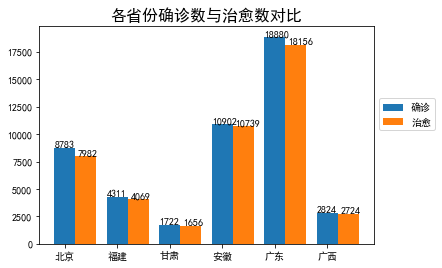

In [3]:
# 各省份确诊数与治愈数对比
bad_total = []
good_total = []
citys = ['北京','福建','甘肃','安徽','广东','广西']

for city in citys:
    data = df[df['city']==f'{city}']
    bad = data['bad'].sum()
    good = data['good'].sum()
    bad_total.append(bad)
    good_total.append(good)
print(bad_total)
print(good_total)


plt.title('各省份确诊数与治愈数对比',fontsize=16)
plt.bar(np.arange(6),bad_total,width=0.4,label='确诊')
for x,y in enumerate(bad_total):
    plt.text(x-0.2,y,y)
plt.bar(np.arange(6)+0.4,good_total,width=0.4,label='治愈')
for x,y in enumerate(good_total):
    plt.text(x+0.25,y,y)
plt.xticks(np.arange(6),citys)
plt.legend(loc='lower left',bbox_to_anchor=[1,0.5,0.5,1])
plt.show()

['安徽', '北京', '福建', '甘肃', '广西', '广东']
[8783, 10902, 18880, 2824, 1722, 4311]


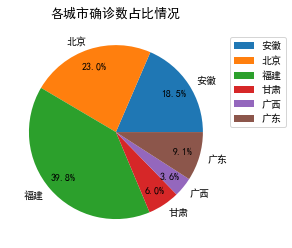

In [4]:
# 各城市确诊数占比情况
city = df['city'].drop_duplicates().tolist()
total_bad = df['bad'].groupby(df['city']).sum().tolist()
print(city)
print(total_bad)

plt.title('各城市确诊数占比情况',fontsize=13)
explode = [0]*len(city)
plt.pie(total_bad,explode,city,pctdistance=0.8,autopct='%.1f%%')
plt.legend(loc='lower left',bbox_to_anchor=[1,0.5,0.5,1])
plt.show()

日期： ['2020/2/29', '2020/3/31', '2020/4/30', '2020/5/31', '2020/6/30', '2020/7/31', '2020/8/31', '2020/9/30', '2020/10/31', '2020/11/30', '2020/12/31']
北京确诊数： [411, 580, 593, 593, 922, 933, 935, 936, 942, 951, 987]
安徽确诊数： [990, 990, 991, 991, 991, 991, 991, 991, 991, 992, 993]
福建确诊数： [296, 345, 356, 358, 363, 366, 383, 409, 436, 487, 512]
广东确诊数： [1349, 1501, 1588, 1595, 1641, 1680, 1740, 1829, 1922, 1989, 2046]
广西确诊数： [252, 254, 254, 254, 254, 255, 255, 259, 260, 263, 264]
甘肃确诊数： [91, 138, 139, 139, 164, 167, 169, 170, 177, 182, 186]


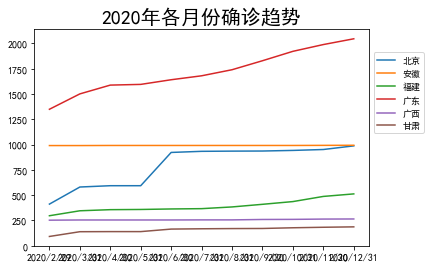

In [5]:
bj = df[df['city']=='北京']
time = bj['date'].tolist()
bj_num = bj['bad'].tolist()

ah = df[df['city']=='安徽']
ah_num = ah['bad'].tolist()

fj = df[df['city']=='福建']
fj_num = fj['bad'].tolist()

gd = df[df['city']=='广东']
gd_num = gd['bad'].tolist()

gx = df[df['city']=='广西']
gx_num = gx['bad'].tolist()

gs = df[df['city']=='甘肃']
gs_num = gs['bad'].tolist()

print('日期：',time)
print('北京确诊数：',bj_num)
print('安徽确诊数：',ah_num)
print('福建确诊数：',fj_num)
print('广东确诊数：',gd_num)
print('广西确诊数：',gx_num)
print('甘肃确诊数：',gs_num)


plt.title('2020年各月份确诊趋势',fontsize=20)
plt.plot(time,bj_num,label='北京')
plt.plot(time,ah_num,label='安徽')
plt.plot(time,fj_num,label='福建')
plt.plot(time,gd_num,label='广东')
plt.plot(time,gx_num,label='广西')
plt.plot(time,gs_num,label='甘肃')
plt.legend(loc='lower left',fontsize=9,bbox_to_anchor=[1,0.5,0.5,1])
# plt.savefig('2020年各月份确诊趋势.png')
plt.show()

In [6]:
b = df[df['city']==f'北京']
b['good'].max()

944

[944, 487, 180, 986, 2010, 261]
<ipython-input-7-b4a7075ff235>:17: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  plt.polar(theta,lists)


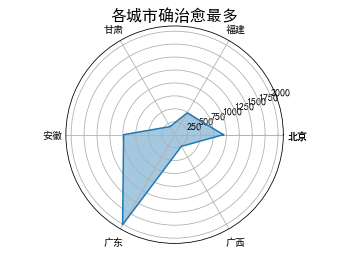

In [7]:
# 各城市确治愈最多
lists = []
citys = ['北京','福建','甘肃','安徽','广东','广西']
for city in citys:
    b = df[df['city']==f'{city}']
    b1 =  b['good'].max()
    lists.append(b1)
print(lists)

import numpy as np
plt.title('各城市确治愈最多',fontsize=16)
plt.axis(False)
theta = np.linspace(0,2*np.pi,len(lists),endpoint=False)
theta = np.concatenate((theta,[theta[0]]))
lists = np.concatenate((lists,[lists[0]]))
citys = np.concatenate((citys,[citys[0]]))
plt.polar(theta,lists)
plt.fill(theta,lists,alpha=0.4)
plt.thetagrids(theta*180/np.pi,citys)
plt.show()
